<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F%20%D0%BD%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA%D0%B0%20%D1%81%20%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%20%D0%9C%D0%B0%D0%BD%D0%BD-%D0%A3%D0%B8%D1%82%D0%BD%D0%B8%20%D0%B8%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mde = 0.05
baseline = 0.2
sample_size = 1030

Fisher exact test  
Z test == Chi square test   
T test   
Bootstrap (Monte-Carlo)  

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Н0: разницы между группами нет == выборки пришли из одного распределения

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

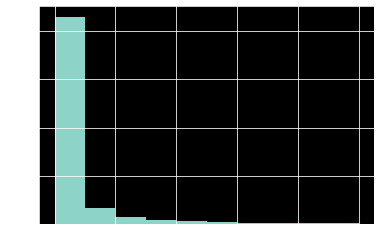

In [ ]:
t.hist()

In [ ]:
(t < 0.05).mean()

0.7753

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
result = []
for _ in tqdm(range(100000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.7816

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.7814

In [ ]:
result = []
for _ in tqdm(range(100000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

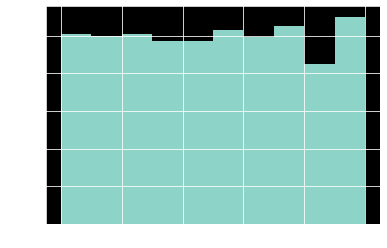

In [ ]:
t.hist()

In [ ]:
import seaborn as sns

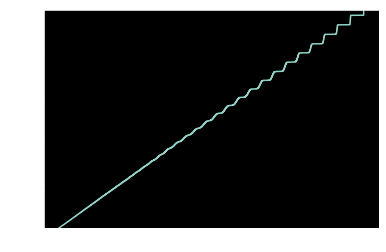

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.05023

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.0501

In [ ]:
t = pd.Series(result)

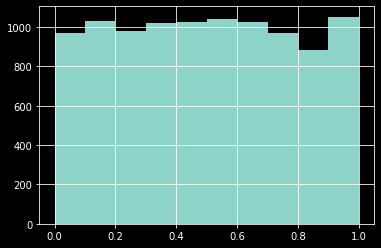

In [ ]:
t.hist()

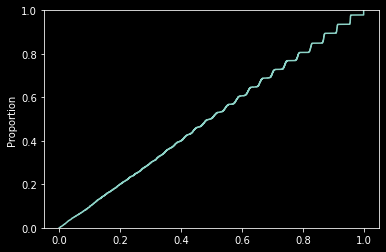

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.0504

# Сэмплы в питоне

https://colab.research.google.com/drive/10DkHtLXsRHYSB7f5LMV5h5WW__uTcNHE?usp=sharing

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [ ]:
sample_size

1092

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.797

1/3

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [ ]:
sample_size1

2184

In [ ]:
sample_size2 = round(sample_size1 * 1/3)

In [ ]:
sample_size2

728

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.8023

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.789

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.30, 0.32)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

8392.38536140766

In [ ]:
# 0.2 , 0.25 | разница была

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((1,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t

,y_true,y_score,y_pred
0,1,5.923651e-03,1
1,1,2.588389e-04,1
2,1,4.717968e-01,0
3,1,1.552739e-04,1
4,1,1.057492e-02,1
...,...,...,...
995,1,1.759710e-01,0
996,1,5.112664e-08,1
997,1,4.609330e-03,1
998,1,1.395371e-04,1


In [ ]:
t['y_pred'].mean()

0.799

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((0,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t

,y_true,y_score,y_pred
0,0,0.827040,0
1,0,0.471170,0
2,0,0.906206,0
3,0,0.761551,0
4,0,0.672519,0
...,...,...,...
995,0,0.614709,0
996,0,0.523922,0
997,0,0.039920,1
998,0,0.146885,0


In [ ]:
t['y_pred'].mean()

0.05

In [ ]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.5
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t['y_true'].mean()

0.5022

In [ ]:
t

,y_true,y_score,y_pred
0,1,0.136483,0
1,0,0.591706,0
2,1,0.014750,1
3,0,0.230490,0
4,1,0.000427,1
...,...,...,...
9995,1,0.043663,1
9996,1,0.019188,1
9997,0,0.258766,0
9998,0,0.915435,0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4978
           1       0.94      0.80      0.86      5022

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.937995337995338

Изменим баланс классов

In [ ]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.95
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t['y_true'].mean()

0.0504

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9496
           1       0.47      0.80      0.59       504

    accuracy                           0.94     10000
   macro avg       0.73      0.88      0.78     10000
weighted avg       0.96      0.94      0.95     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.4664351851851852

In [ ]:
t['y_pred'] = (t['y_score'] < 0.01)*1

In [ ]:
t['y_true'].mean()

0.0504

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9496
           1       0.76      0.57      0.65       504

    accuracy                           0.97     10000
   macro avg       0.87      0.78      0.82     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.7592592592592593

https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f

In [ ]:
mde

0.05

In [ ]:
a = np.random.binomial(1,baseline,size=sample_size)
b = np.random.binomial(1,baseline + 0.01,size=sample_size)

In [ ]:
a = pd.DataFrame(a)

In [ ]:
a['group'] = 0

In [ ]:
a

,0,group
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1025,0,0
1026,0,0
1027,1,0
1028,1,0


In [ ]:
b = pd.DataFrame(b)

In [ ]:
b['group'] = 1

In [ ]:
df = pd.concat([a,b])

In [ ]:
df.groupby('group')[0].agg(['count','mean'])

,count,mean
group,,
0,1030,0.205825
1,1030,0.225243


In [ ]:
df

,0,group
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1025,1,1
1026,1,1
1027,1,1
1028,0,1


In [ ]:
import statsmodels.api as sm

spector_data = sm.datasets.spector.load_pandas()

spector_data.exog = sm.add_constant(spector_data.exog)



In [ ]:
spector_data.endog

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    1.0
22    0.0
23    0.0
24    1.0
25    1.0
26    1.0
27    0.0
28    1.0
29    1.0
30    0.0
31    1.0
Name: GRADE, dtype: float64

In [ ]:
spector_data.exog

,const,GPA,TUCE,PSI
0,1.0,2.66,20.0,0.0
1,1.0,2.89,22.0,0.0
2,1.0,3.28,24.0,0.0
3,1.0,2.92,12.0,0.0
4,1.0,4.00,21.0,0.0
5,1.0,2.86,17.0,0.0
6,1.0,2.76,17.0,0.0
7,1.0,2.87,21.0,0.0
8,1.0,3.03,25.0,0.0
9,1.0,3.92,29.0,0.0


In [ ]:
df['const'] = 1

In [ ]:
# Logit Model
logit_mod = sm.Logit(df[[0]], df[['group','const']])

logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.520918
         Iterations 5


In [ ]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2060
Model:                          Logit   Df Residuals:                     2058
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:               0.0005350
Time:                        14:17:14   Log-Likelihood:                -1073.1
converged:                       True   LL-Null:                       -1073.7
Covariance Type:            nonrobust   LLR p-value:                    0.2838
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
group          0.1149      0.107      1.071      0.284      -0.095       0.325
const         -1.3503      0.077    -17.521      0.000      -1.501      -1.199


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
a

,0,group
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1025,0,0
1026,0,0
1027,1,0
1028,1,0


In [ ]:
proportions_ztest([sum(a[0]),sum(b[0])],[len(a[0]),len(b[0])],alternative='two-sided')

(-1.071646235180317, 0.28387895812484687)